In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

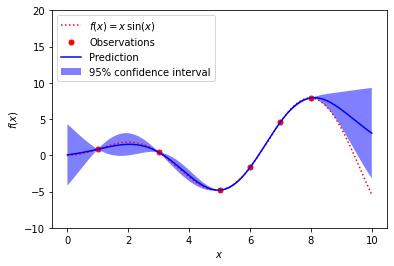

In [3]:
np.random.seed(1)

def f(x):
    """ Function to predict """
    return x * np.sin(x)

X = np.atleast_2d([1., 3., 5., 6., 7., 8.]).T

y = f(X).ravel()

x = np.atleast_2d(np.linspace(0, 10, 1000)).T

kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)

gp.fit(X, y)

y_pred, sigma = gp.predict(x, return_std=True)

plt.figure()
plt.plot(x, f(x), 'r:', label=r'$f(x) = x\, \sin(x)$')
plt.plot(X, y, 'r.', markersize=10, label='Observations')
plt.plot(x, y_pred, 'b-', label='Prediction')
plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate([y_pred - 1.9600 * sigma,
                         (y_pred + 1.9600 * sigma)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylim(-10, 20)
plt.legend(loc='upper left')

## Plot from Excel

In [4]:
import numpy as np
import pandas as pd
import warnings; warnings.simplefilter("ignore")
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
csv = pd.read_csv(r"testing.csv")

In [6]:
print(csv["x"])
print(csv['y'])

0     7
1     8
2    10
3    20
4    30
Name: x, dtype: int64
0    170.857523
1    170.487173
2    170.336920
3    168.406835
4    165.519875
Name: y, dtype: float64


In [7]:
excel = pd.read_excel(r"testing.xlsx")
print(excel)

    x           y
0   7  170.857523
1   8  170.487173
2  10  170.336920
3  20  168.406835
4  30  165.519875


In [8]:
X = excel["x"]
Y = excel["y"]

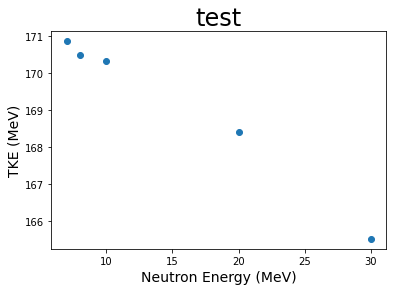

In [9]:
plt.title ("test", fontsize=24)
plt.xlabel("Neutron Energy (MeV)", fontsize=14)
plt.ylabel("TKE (MeV)", fontsize=14)
plt.scatter(X, Y, label="test")
plt.show()

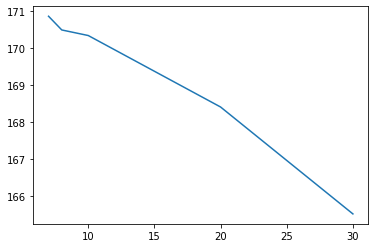

In [10]:
plt.plot(X, Y, label="test")
plt.show()

In [11]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.gaussian_process.kernels import WhiteKernel, DotProduct, Matern

In [12]:
X = np.atleast_2d([7, 8, 10, 20, 40]).T
X

array([[ 7],
       [ 8],
       [10],
       [20],
       [40]])

In [13]:
Y = excel["y"]
Y

0    170.857523
1    170.487173
2    170.336920
3    168.406835
4    165.519875
Name: y, dtype: float64

In [14]:
x = np.atleast_2d(np.linspace(5, 50, 1000)).T

In [15]:
# kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
# kernel = RBF(1.0, (1e-3, 1e3)) * C (1.0, (1e-3, 1e3)) + WhiteKernel()
# kernel = DotProduct() + WhiteKernel()
kernel = 1.0 * Matern(length_scale = 1.0, nu=1.5)

In [16]:
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
gp.fit(X, Y)

GaussianProcessRegressor(kernel=1**2 * Matern(length_scale=1, nu=1.5),
                         n_restarts_optimizer=9)

In [17]:
y_pred, sigma = gp.predict(x, return_std=True)

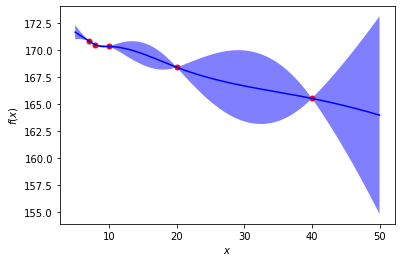

In [18]:
plt.figure()
plt.plot(X, Y, 'r.', markersize=10, label='Observations')
plt.plot(x, y_pred, 'b-', label='Prediction')
plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate([y_pred - 1.9600 * sigma, 
                        (y_pred + 1.9600 * sigma)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% cofidence interval')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')

plt.show()